In [143]:
from matplotlib import pyplot as plt
import numpy as np
import PIL
import os
import scipy

In [144]:
data_infile = open('85Rh1.36.37__d0.37m_a20um_p110um_step-4.2_dith23.25_1.raw','rb')
data_infile2 = open('FF85Rh1.63.10__d0.1m_a20um_p110um_step-4.2_dith23.25_1.raw', 'rb')


data_array = np.fromfile(data_infile,dtype='float32',count=256*256)
data_image = PIL.Image.frombuffer("F",[256,256],data_array,'raw','F',0,1)

data_array2 = np.fromfile(data_infile2,dtype='float32',count=256*256)
data_image2 = PIL.Image.frombuffer("F",[256,256],data_array2,'raw','F',0,1)

Text(0.5, 0.98, '85Rh.36.37')

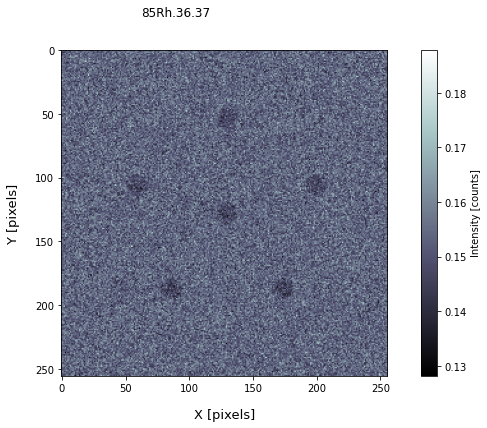

In [145]:
img1 = np.array(data_image.getdata())
img1=img1.reshape(256,256) 

img2 = np.array(data_image2.getdata())
img2=img2.reshape(256,256) 

img3 = img1/img2

fig2=plt.figure(figsize=(12,6))
ax1=fig2.add_subplot(111)
ax1.set_xlabel('X [pixels]', fontsize=13,labelpad=15)
ax1.set_ylabel('Y [pixels]', fontsize=13,labelpad=15)

p1= ax1.imshow(img3, cmap='bone')
cbar = fig2.colorbar(p1)
cbar.set_label('Intensity [counts]')
fig2.suptitle('85Rh.36.37')


4.123940529025337

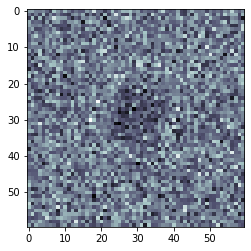

In [146]:
img_crop = img3[25:85,100:160]
sigma = np.std(img_crop)
mean = np.mean(img_crop)
vis = sigma/mean
plt.imshow(img_crop,cmap='bone')
vis*100

array([], dtype=float64)

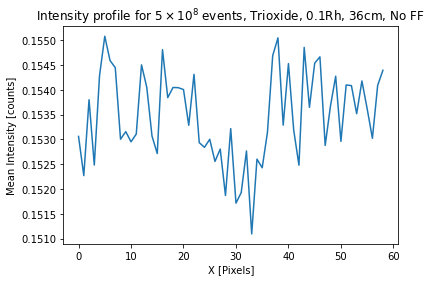

In [147]:
x_profile1 = np.mean(img_crop,0)

plt.plot(x_profile1[1::])
plt.title(r'Intensity profile for $5 \times 10^{8}$ events, Trioxide, 0.1Rh, 36cm, No FF')
plt.xlabel('X [Pixels]')
plt.ylabel('Mean Intensity [counts]')
#x_profile1.shape
x_profile1[245::]


In [26]:
REF = np.genfromtxt('1.8e9_speckle/DATA_MIST/REF_00.txt')
SAMP = np.genfromtxt('1.8e9_speckle/DATA_MIST/SAMP_00.txt')
FF = np.genfromtxt('FF_2.txt')
IM_C = REF/FF
IM_Crop = IM_C[0:75,0:75]
plt.imshow(IM_C, cmap='bone')
plt.colorbar()


OSError: 1.8e9_speckle/DATA_MIST/REF_00.txt not found.

In [21]:
def PI(name,inicial,final,h,y):
    P=np.zeros(y-h)
    for i in range(inicial,final):
        P=P+name[i,h:y]
    mean=P/(final-inicial)
    return mean


In [29]:
root = scipy.ndimage.shift(img1,[0,np.pi])

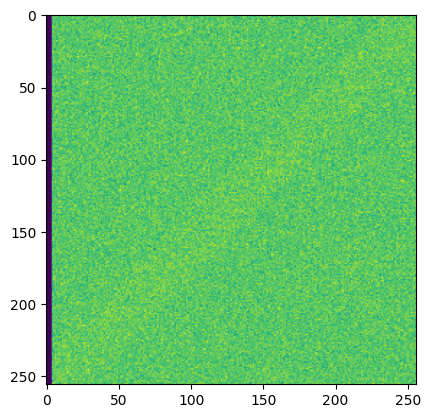

In [30]:
plt.imshow(root)